In [2]:
import numpy as np
import cvxpy as cp

# Final exam
## Question 03
### Koidala Surya Prakash
### EE18btech11026

### 3. a Convexity ?

We can reformulate the problem in the form :

objective := x.T(Q)x + (c.T)x
constraints := Ax <= b

where :  x = [x1,x2]

        Q = [[1,-0.5]
             [-0.5, 2] ]

         c = [-1, 0 ]
         
         A = [[1,-2]
             ,[1,4],
              [5,-76]]
              
         b = [u1,
              u2,
              1]
              
Since the obj is in quadratic form and constraints are in linear form 

This is a QP problem 

We know that all QP problems are convex optimisation problems . Hence this problem is convex.

### 3. b : Finding optimal variables

In [3]:

### Constants
u1 = -2
u2=  -3

b = np.array([[u1,u2,1]]).T

Q = np.array([[1,-0.5],[-0.5, 2]])
c = np.array([[-1,0]]).T

A = np.array([[1,-2],[1,4],[5,-76]])


In [4]:
'''
Objective : A QP problem of the form (x.T)Q(x) + c.T*x
with affine constraints : Ax <= b 

Therefore this is a convex problem
'''

x = cp.Variable((2,1))
obj = cp.Minimize( cp.quad_form(x, Q) + c.T@x )
constraints = [A@x <= b]

prob = cp.Problem(obj, constraints)
prob.solve()

lam = constraints[0].dual_value

print("The following are the optimal primal variables : \n")

print('x1* = %.4f'%x.value[0][0])
print('x2* = %.4f'%x.value[1][0])
print('\n')

print("The following are the optimal dual variables : \n")
print('lamda_1* = %.4f' %lam[0])
print('lamda_2* = %.4f' %lam[1])
print('lamda_3* = %.4f' %lam[2])


The following are the optimal primal variables : 

x1* = -2.3333
x2* = -0.1667


The following are the optimal dual variables : 

lamda_1* = 2.8645
lamda_2* = 2.2980
lamda_3* = 0.0675


## 3.c Verifying KKT conditions

The primal variables and dual optimal variables satisfy the below mentioned kkt conditions.

1. fi(x*) <= 0 ==> Ax-b <= 0
2. lam >=0 
3. lam*fi(x*) == 0
4. dfo(x)/dx + sum(lam_i* dfi(x)/dx  ) == 0

In [ ]:
'''
Verifying KKT conditions..
'''
'''
1. fi(x*) <= 0 ==> Ax-b <= 0
'''

print('Condition 1 :: obeys all constraints')
print('____________')
print('Ax* - b =  \n', np.round(A@x.value - b, 3))

# 2. lam >=0 
print("\nCondition 2 :: all lamda values are positive")
print('____________')
print('lam_i = \n',lam)

# 3. lam*fi(x*) == 0

print("\nCondition 3 :: since constraint func are zero")
print('____________')
print("lam_i * x* = \n",np.round(lam*(A@x.value - b),3) )


# 4. dfo(x)/dx + sum(lam_i* dfi(x)/dx  ) == 0
'''
dfo(x)/dx = Qx + c
dfi(x)/dx  = a == > sum(lam_i* dfi(x)/dx) = A.T*lam 
'''
print("\nCondition 4 :: dfo(x)/dx + sum(lam_i* dfi(x)/dx  ) == 0")
print('____________')
print(np.round(2*Q@x.value + c + A.T@lam,3))


Condition 1 :: obeys all constraints
____________
Ax* - b =  
 [[0.]
 [0.]
 [0.]]

Condition 2 :: all lamda values are positive
____________
lam_i = 
 [[2.86447804]
 [2.29803246]
 [0.0674979 ]]

Condition 3 :: since constraint func are zero
____________
lam_i * x* = 
 [[0.]
 [0.]
 [0.]]

Condition 4 :: dfo(x)/dx + sum(lam_i* dfi(x)/dx  ) == 0
____________
[[ 0.]
 [-0.]]


## 3.d Plotting level curves

In [ ]:
### Function finding p*(u1,u2)
def p(u1,u2):
    b = np.array([[u1,u2,1]]).T
    Q = np.array([[1,-0.5],[-0.5, 2]])
    c = np.array([[-1,0]]).T
    A = np.array([[1,-2],[1,4],[5,-76]])
    
    x = cp.Variable((2,1))
    obj = cp.Minimize( cp.quad_form(x, Q) + c.T@x )
    constraints = [A@x <= b]

    prob = cp.Problem(obj, constraints).solve()
    return obj.value


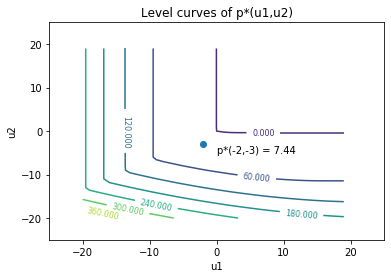

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

### Here u1 == X , u2 == Y , p*(u1,u2) = Z

# List of points in x axis
XPoints     = []

# List of points in y axis
YPoints     = []

# X and Y points are from -20 to +20 varying in steps of .5
lis = np.arange(-20,20,1)
for val in lis:
    XPoints.append(val)
    YPoints.append(val)
    
# Z values as a matrix
ZPoints = np.ndarray((len(XPoints),len(YPoints)))

   
for x in range(0, len(XPoints)):
    for y in range(0, len(YPoints)):
        ZPoints[x][y] = p(XPoints[x],YPoints[y])

# Set the x axis and y axis limits
pylab.xlim([-25,25])
pylab.ylim([-25,25])

# Provide a title for the contour plot
plt.title('Level curves of p*(u1,u2)')

# Set x axis label for the contour plot
plt.xlabel('u1')

# Set y axis label for the contour plot
plt.ylabel('u2')

# Create contour lines or level curves using matplotlib.pyplot module
contours = plt.contour(XPoints, YPoints, ZPoints)

# Display z values on contour lines
plt.clabel(contours, inline=1, fontsize=8)

# Display the contour plot

plt.scatter([-2], [-3])

plt.annotate("p*(-2,-3) = 7.44 ", (0,-5))

plt.show()

### 3.e Convexity of p* from level curves

We can see that the gradient of the slopes are increasing as we move towards right part of the curve. This is seen in both the directions

===> Thus p* is convex 

since d^2(p)/du1^2 >= 0  d^2(p)/du2^2 >= 0

### 3.f Numerical verification